<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1hG9C4e6Tisw2VTEatGkP_hRmnZNpbXK4" width = "300" align="center"/>


El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento.

* Se solicita ajustar al menos tres modelos de clasificación:
     * Regresión logística
     * K-Nearest Neighbours
     * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_.
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [6]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [8]:
digits.describe() #Un describe de los datos y ver que el comportamiento es similar en todos, ademas hay 1797 regi

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [9]:
digits.isnull().sum() #No hay datos nulos

c00       0
c01       0
c02       0
c03       0
c04       0
         ..
c60       0
c61       0
c62       0
c63       0
target    0
Length: 65, dtype: int64

In [10]:
digits.dtypes #el tipo de datos son int64

c00       int64
c01       int64
c02       int64
c03       int64
c04       int64
          ...  
c60       int64
c61       int64
c62       int64
c63       int64
target    int64
Length: 65, dtype: object

In [11]:
digits.info() #Se usan 912.7 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

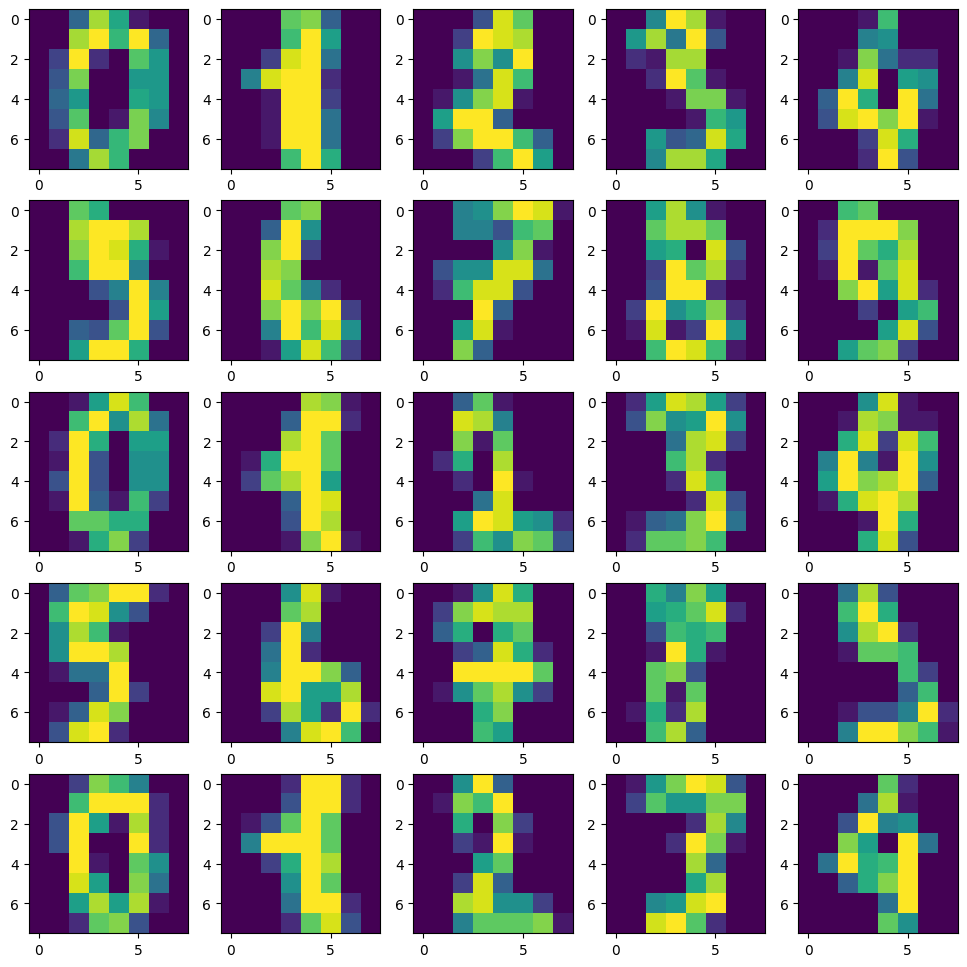

In [13]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i in range(25): #se usan 25 pues es 5*5
    axs[i//5,i%5].imshow(digits_dict["images"][i]) #se usa la llave "images"

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [14]:
#Librerías
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing

In [15]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

In [16]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=150)

In [17]:
print("Largo Grupo entrenamiento:\n", len(X_train))
print("Largo Grupo de testeo:\n", len(X_test))

Largo Grupo entrenamiento:
 1527
Largo Grupo de testeo:
 270


Regresión Logística



In [18]:
#MODELO DE REGRESION LOGISTICA
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# predecir
lr_pred = lr.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracy1=accuracy_score(y_test, lr_pred)
recall1=recall_score(y_test, lr_pred,average='weighted')
precision1=precision_score(y_test, lr_pred,average='weighted' )
fscore1=f1_score(y_test, lr_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,lr_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy1)
print('recall:     ',recall1)
print('precision:  ',precision1)
print('f-score:    ',fscore1)
print("")


Matriz de confusion:
 
[[27  0  0  0  0  1  0  0  0  0]
 [ 0 29  0  0  0  0  1  0  4  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  1  0]
 [ 0  1  0  0 20  0  0  0  0  0]
 [ 0  1  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  1]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  1  0  0  0  0  1 29]]

Metricas:
 
accuracy:    0.9518518518518518
recall:      0.9518518518518518
precision:   0.9551216788985606
f-score:     0.9524979323646522



In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time

#Diccionario de Hiperparámetros
dicc_rlog = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01, 0.001],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }
grid_lr = GridSearchCV(estimator = lr, param_grid = dicc_rlog, refit = True, n_jobs=-1)

start_time = time.time() #Tiempo de inicio

grid_result_lr = grid_lr.fit(X_train, y_train)
grid_result_lr
print("Tuned Hyperparameters :", grid_result_lr.best_params_)
print("Accuracy :",grid_result_lr.best_score_)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.")

Tuned Hyperparameters : {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.9679031393978356
Este modelo se ajustó en 45.23750829696655 segundos.


In [20]:
#MODELO REGRESION LOGISTICA HIPERPARAMETROS
lrg = LogisticRegression(C=0.01, class_weight='balanced', penalty='l2', solver = 'liblinear').fit(X_train, y_train)

# predecir
lr_pred = lrg.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracy2=accuracy_score(y_test, lr_pred)
recall2=recall_score(y_test, lr_pred,average='weighted')
precision2=precision_score(y_test, lr_pred,average='weighted' )
fscore2=f1_score(y_test, lr_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,lr_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy2)
print('recall:     ',recall2)
print('precision:  ',precision2)
print('f-score:    ',fscore2)
print("")


Matriz de confusion:
 
[[27  0  0  0  0  1  0  0  0  0]
 [ 0 30  0  0  0  0  1  0  3  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  1  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  1]
 [ 0  1  0  0  0  0  1  0 21  0]
 [ 0  0  0  0  0  0  0  0  1 30]]

Metricas:
 
accuracy:    0.9592592592592593
recall:      0.9592592592592593
precision:   0.9620476894670442
f-score:     0.9597807279325844



Podemos ver que el modelo con los hiperparámetros ajustados solo mejora un poco al modelo de regresión logística sin hiperparámetros ajustados.

KNN

In [21]:
#MODELO KNN
knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)

# predecir
knn_pred = knn.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracy3=accuracy_score(y_test, knn_pred)
recall3=recall_score(y_test, knn_pred,average='weighted')
precision3=precision_score(y_test, knn_pred,average='weighted' )
fscore3=f1_score(y_test, knn_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knn_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy3)
print('recall:     ',recall3)
print('precision:  ',precision3)
print('f-score:    ',fscore3)
print("")


Matriz de confusion:
 
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  0 30]]

Metricas:
 
accuracy:    0.9888888888888889
recall:      0.9888888888888889
precision:   0.9892825334760817
f-score:     0.988872474261948



In [22]:
#Diccionario de Hiperparámetros
dicc_knn = {
          'n_neighbors' : [1,2,3,4,5, 6, 10, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }


grid_knn = GridSearchCV(estimator = knn, param_grid = dicc_knn, cv = 20)

start_time = time.time() #Tiempo de inicio

grid_result_knn = grid_knn.fit(X_train, y_train)
print("Tuned Hyperparameters :", grid_knn.best_params_)
print("Accuracy :",grid_knn.best_score_)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.")

Tuned Hyperparameters : {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy : 0.9882347915242653
Este modelo se ajustó en 37.43466591835022 segundos.


In [23]:
#MODELO KNN HIPERPARAMETROS
knng = neighbors.KNeighborsClassifier(algorithm = 'kd_tree', metric= 'euclidean', n_neighbors=3, weights='uniform').fit(X_train, y_train)

# predecir
knng_pred = knng.predict(X_test)
y_true = y_test

#Guardamos los datos para la comparativa final
accuracy4=accuracy_score(y_test, knng_pred)
recall4=recall_score(y_test, knng_pred,average='weighted')
precision4=precision_score(y_test, knng_pred,average='weighted' )
fscore4=f1_score(y_test, knng_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knng_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy4)
print('recall:     ',recall4)
print('precision:  ',precision4)
print('f-score:    ',fscore4)
print("")


Matriz de confusion:
 
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  1]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  0 30]]

Metricas:
 
accuracy:    0.9851851851851852
recall:      0.9851851851851852
precision:   0.9855788297723781
f-score:     0.9851628179646994



Notemos ninguna métrica mejoró.



Random Forest

In [24]:
#MODELO RANDOMFOREST
rfc =  RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

#predecir
y_true =  y_test
rfc_pred = rfc.predict(X_test)

#Guardamos los datos para la comparativa final
accuracy5=accuracy_score(y_true, rfc_pred)
recall5=recall_score(y_true, rfc_pred,average='weighted')
precision5=precision_score(y_true, rfc_pred,average='weighted')
fscore5=f1_score(y_true, rfc_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knn_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy5)
print('recall:     ',recall5)
print('precision:  ',precision5)
print('f-score:    ',fscore5)
print("")


Matriz de confusion:
 
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  0 30]]

Metricas:
 
accuracy:    0.9777777777777777
recall:      0.9777777777777777
precision:   0.978130786117438
f-score:     0.9776539457797846



In [25]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters


rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

start_time = time.time() #Tiempo de inicio
rfc_random.fit(X_train, y_train)
print("Este modelo se ajustó en",(time.time() - start_time),"segundos.")
print(rfc_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Este modelo se ajustó en 38.86295938491821 segundos.
{'n_estimators': 166, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [26]:
#MODELO RANDOMFOREST HIPERPARAMETROS
rfcg =  RandomForestClassifier(n_estimators=144,min_samples_split=2,min_samples_leaf=2,max_features='auto',max_depth=60, bootstrap=False).fit(X_train,y_train)

#predecir
y_true =  y_test
rfcg_pred = rfcg.predict(X_test)

#Guardamos los datos para la comparativa final
accuracy6=accuracy_score(y_true, rfcg_pred)
recall6=recall_score(y_true, rfcg_pred,average='weighted')
precision6=precision_score(y_true, rfcg_pred,average='weighted')
fscore6=f1_score(y_true, rfcg_pred,average='weighted')

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,knn_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy6)
print('recall:     ',recall6)
print('precision:  ',precision6)
print('f-score:    ',fscore6)
print("")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Matriz de confusion:
 
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0 20  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  1  0  0  0  0  0  0 22  0]
 [ 0  0  0  0  1  0  0  0  0 30]]

Metricas:
 
accuracy:    0.9814814814814815
recall:      0.9814814814814815
precision:   0.9818344898211417
f-score:     0.9814554529146251



Notar que existe una mejora en todas las métricas.

Podemos ver además que el modelo que más tiempo tardó en ajustarse fue el de Regresió Logística, y el que menos tiempo tardó en ajustarse fue KNN.

El mejor modelo al observar las métricas resulta ser el KNN.

Como KNN resulta tener las mejores métricas, y además no tardó mucho en ajustarse, se elegirá este para el procedimiento.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


# Binarize the output
ry = label_binarize(y, classes=digits["target"].unique())
n_classes = y_test.shape[0]

n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, ry,
                                                    test_size=0.3,
                                                    train_size = 0.7)


# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier())
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

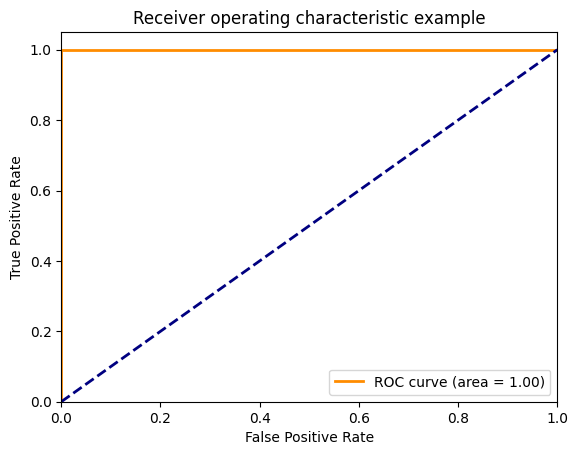

In [28]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [29]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

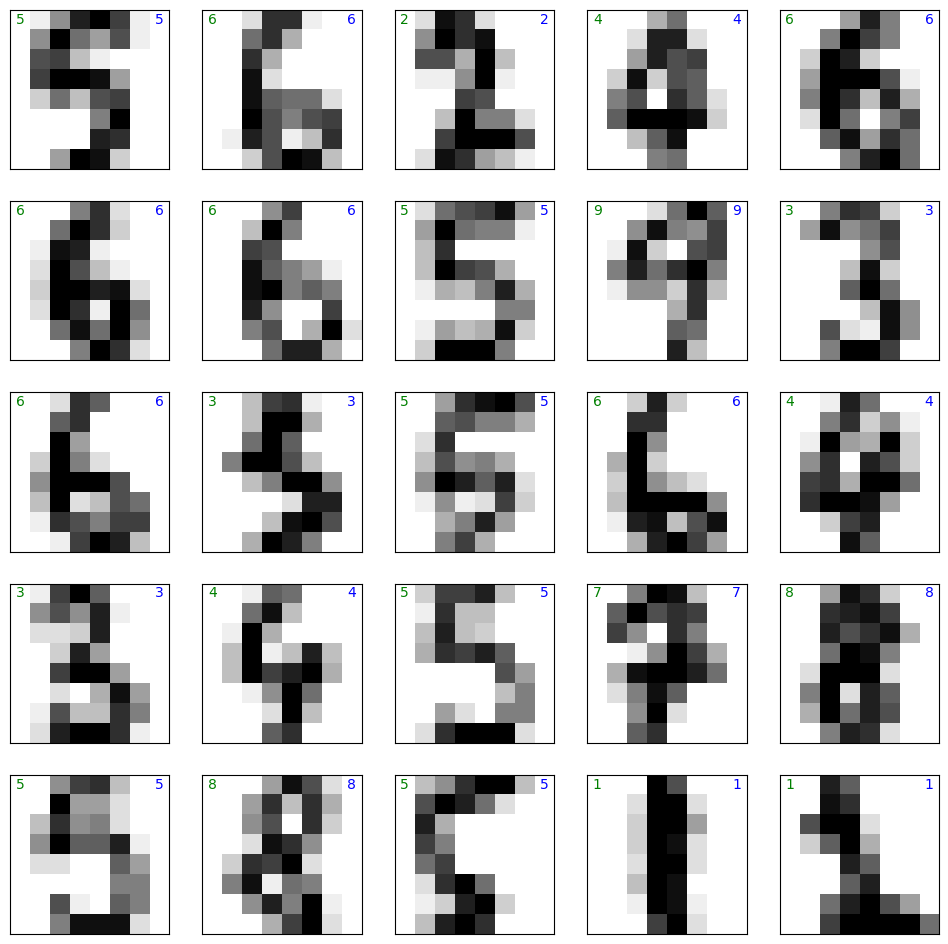

In [30]:
mostrar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "correctos")

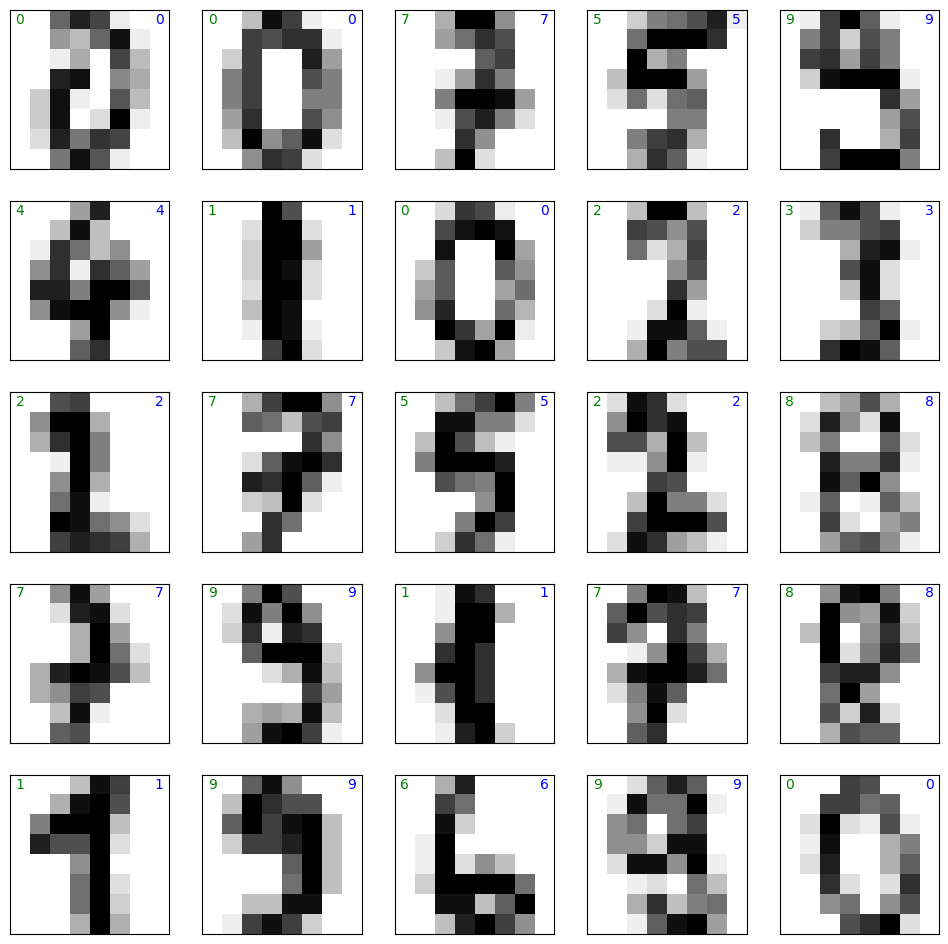

In [42]:
mostrar_resultados(digits,KNeighborsClassifier(algorithm = 'kd_tree', metric= 'euclidean', n_neighbors=3, weights='uniform'),nx=5, ny=5,label = "correctos")

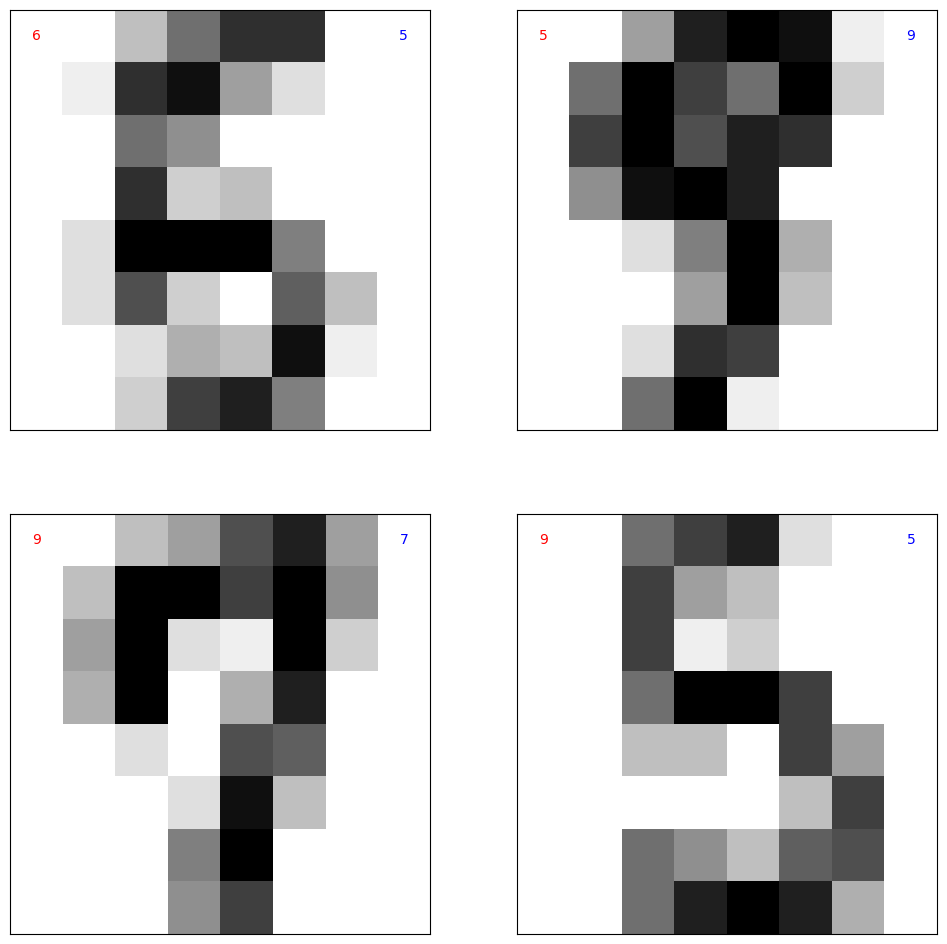

In [41]:
mostrar_resultados(digits,KNeighborsClassifier(),nx=2, ny=2,label = "incorrectos") #tuve que poner nx=2 y ny=2 para que no saltara error, pero hay otro dígito más que es incorrecto

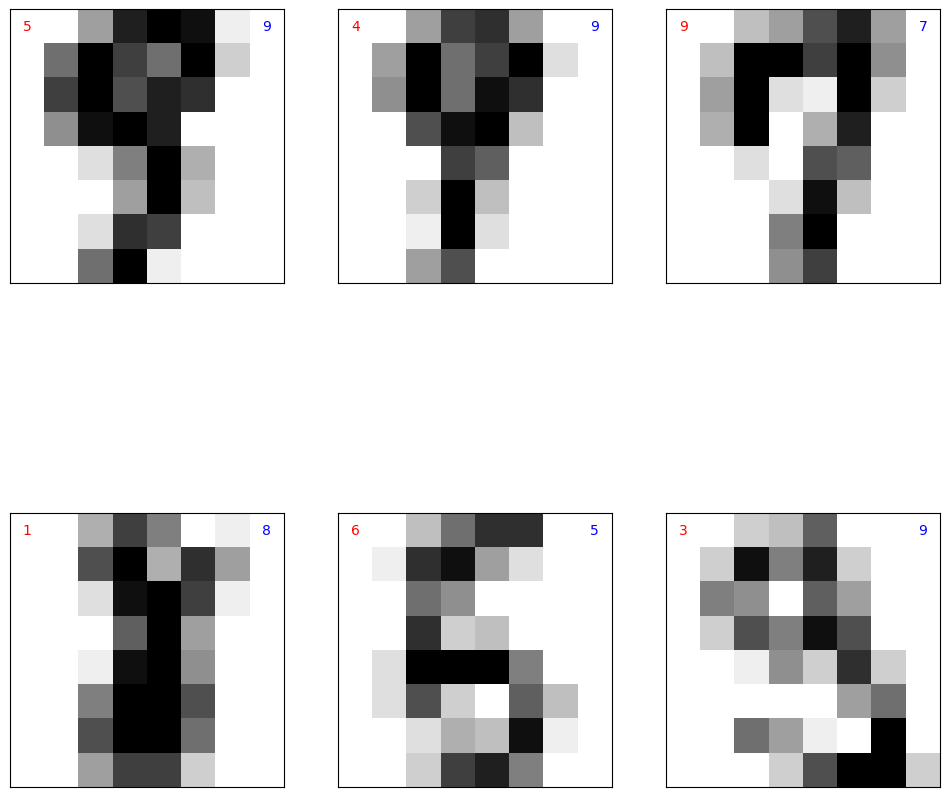

In [43]:
mostrar_resultados(digits,KNeighborsClassifier(algorithm = 'kd_tree', metric= 'euclidean', n_neighbors=3, weights='uniform'),nx=2, ny=3,label = "incorrectos")

Se puede ver que, de hecho, el modelo con hiperparámetros ajustados falla en un dígito más que el de sin hiperparámetros (se puede hacer la prueba poniendo nx=2, ny=3, y ver que queda una cazilla blanca. Yo no lo quise hacer a efectos prácticos porque tira un error).
Estas fallas pueden ocurrir porque el valor está demasiado nublado y porque el modelo fallará ciertas veces, podemos ver que tiene un accurate cercano a 1, pero no es 1. Esto se podría solucionar, tal vez, tomando más cantidad de muestreo al momento de realizar el entrenamiento del modelo.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Se pudieron predecir la mayoría de los dígitos utilizando KNN, mostrando que es un modelo eficiente y además, bastante rápido. Las princiales dificultades vinieron del entendimiento del problema y el análisis del mismo. Tal vez para trabajos futuros se pueda mejorar el modelo para que las fallas disminuyan aún más, sin embargo, este se vio que era bastante bueno.